# Cellular Automata and Computation

In this workbook I investigate cellular automata visually and using machine learning. In our case cellular automata (CA) will be an array of 'cells' which take some value. The states of the cells will evolve in time based on their neighbors. CA evolution is often greatly simplified by restricting update rules to interactions between nearest or next-to-nearest neighbors.

One obvious problem to investigate is the degree to which the function of a cellular automaton can be modelled using machine learning methods. In the first part I'll begin by generating some cellular automata for viewing.

In [7]:
import numpy as np
import matplotlib.pyplot as pp
%matplotlib inline
import seaborn

## Cellular Automata Spacetime
A CA spacetime is a matrix with each column representing the evolution of a cell through time. The following function begins with a single array indicating the initial state of the CA universe and constructs the matrix one row at a time by evolving the matrix according to a ruleset.

In [85]:
def generate_spacetime_NNN(rule, n = 200, ca_duration = 400, ca_width = 400):
    m = ca_width-n
    spacetime = []
    space = np.int64( np.hstack((np.ones(n), np.zeros(m))) )
    np.random.shuffle( space )
    spacetime.append( space )
    s0 = list(range(ca_width))
    sl3 = s0[3:] + s0[:3]
    sl2 = s0[2:] + s0[:2]
    sl1 = s0[1:] + s0[:1]
    sr1 = s0[-1:] + s0[:-1]
    sr2 = s0[-2:] + s0[:-2]
    sr3 = s0[-3:] + s0[:-3]

    for time_step in range(ca_duration):
        values = 64*spacetime[time_step][sr3] + 32*spacetime[time_step][sr2] + 16*spacetime[time_step][sr1] + 8*spacetime[time_step][s0] + 4*spacetime[time_step][sl1] + 2*spacetime[time_step][sl2] + spacetime[time_step][sl3]
        space = []
        for value in values:
            if ((np.uint64(rule[value//64]) << np.uint64(value % 64)) & 0x8000000000000000):
                space.append(1)
            else:
                space.append(0)
        spacetime.append( np.asarray(space) )

    return np.asmatrix(spacetime)

In [103]:
from matplotlib.colors import ListedColormap

def show_spacetime(spacetime):
    # make a color map of fixed colors
    cmap = ListedColormap(['gold','black'])
    # tell imshow about color map so that only set colors are used
    img = pp.imshow(spacetime,interpolation='nearest',
                    cmap = cmap)
    #pp.colorbar(img,cmap=cmap, ticks=[0,1])
    pp.show()

Now let's look at three spacetimes for CA rulesets which have been found to perform the computational task of identifying whether the spacetime is mostly in the on or off state.

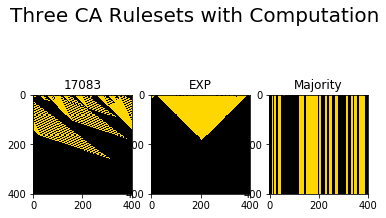

In [112]:
rule_17083 = [0x031001001fa00013, 0x331f9fff5975ffff]
rule_exp = [0x0505408305c90101, 0x200b0efb94c7cff7]
rule_majority = [0x0001011701171777, 0x01171777177f7fff]
rules = [rule_17083, rule_exp, rule_majority]
titles = ['17083', 'EXP', 'Majority']

from matplotlib.colors import ListedColormap
fig, subfigs = pp.subplots(1,3)
cmap = ListedColormap(['gold','black'])
fig.suptitle('Three CA Rulesets with Computation', fontsize=20)

for i in range(3):
    ax = subfigs[i]
    ax.set_title(titles[i])
    spacetime = generate_spacetime_NNN(rules[i],n = 200, ca_duration = 400, ca_width = 400)
    ax.imshow(spacetime,interpolation='nearest',
                    cmap = cmap)


One interesting feature of 17083 and EXP is that local information is carried through the spacetime by 'particles' or propagating bits of information that can interact according to some ruleset. There is probably a deeper meaning in this, which we will not get into here.

# This notebook is still under construction - check back for more in the coming week 7/25